In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances

In [2]:
# Outliner / Invalid value

In [3]:
df = pd.read_excel('dataset.xlsx', sheet_name = 'outlier')

In [4]:
df.head()

,ID,salary
0,1001,21652
1,1002,20007
2,1003,29464
3,1004,25998
4,1005,21565


In [5]:
df.info()
# สามารถบอกได้ว่ามีค่า null อยู่ในแต่ละcolumnไหม

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      30 non-null     int64
 1   salary  30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [6]:
df.describe()

,ID,salary
count,30.000000,30.000000
mean,1015.500000,26609.800000
std,8.803408,9994.181705
min,1001.000000,4780.000000
25%,1008.250000,22031.750000
50%,1015.500000,25420.000000
75%,1022.750000,28215.750000
max,1030.000000,60100.000000


In [7]:
# Using Percentile

C:\Users\Khunkan\opencv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Khunkan\opencv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Khunkan\opencv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary', ylabel='Density'>

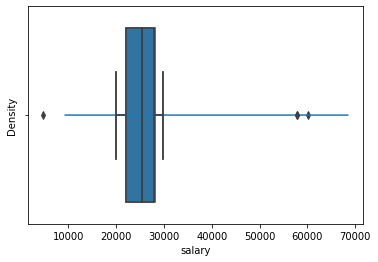

In [8]:
df = pd.read_excel('dataset.xlsx', sheet_name='outlier')
df2=df.copy()
df2.describe()
sns.boxplot(df2['salary'])
upper_limit = df2['salary'].quantile(0.99)
lower_limit = df2['salary'].quantile(0.01)
df2 = df2[(df2['salary'] <= upper_limit) & (df2['salary'] >= lower_limit)]
df2.describe()
sns.distplot(df2['salary'])
sns.boxplot(df2['salary'])

In [9]:
df2 = df.copy()

In [10]:
upper_limit = df2['salary'].quantile(0.99)
lower_limit = df2['salary'].quantile(0.01)

In [11]:
upper_limit

59433.29

In [12]:
lower_limit

9195.83

In [13]:
df2 = df2[(df2['salary'] <= upper_limit) & (df2['salary'] >= lower_limit)]

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      28 non-null     int64
 1   salary  28 non-null     int64
dtypes: int64(2)
memory usage: 672.0 bytes


In [15]:
# Using IQR

In [16]:
df3 = df.copy()

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      30 non-null     int64
 1   salary  30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [18]:
df3.describe()

,ID,salary
count,30.000000,30.000000
mean,1015.500000,26609.800000
std,8.803408,9994.181705
min,1001.000000,4780.000000
25%,1008.250000,22031.750000
50%,1015.500000,25420.000000
75%,1022.750000,28215.750000
max,1030.000000,60100.000000


In [19]:
q1 = df3['salary'].quantile(0.25)
q3 = df3['salary'].quantile(0.75)
iqr = q3-q1
iqr

6184.0

In [20]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

In [21]:
df3 = df3[df3['salary'] < upper_limit]
df3 = df3[df3['salary'] > lower_limit]

In [22]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      27 non-null     int64
 1   salary  27 non-null     int64
dtypes: int64(2)
memory usage: 648.0 bytes


C:\Users\Khunkan\opencv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary'>

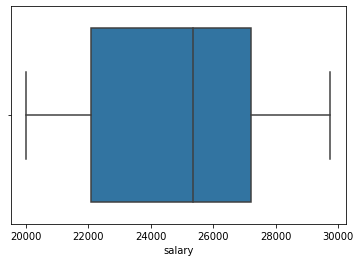

In [23]:
# IQR
sns.boxplot(df3['salary'])

C:\Users\Khunkan\opencv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='salary'>

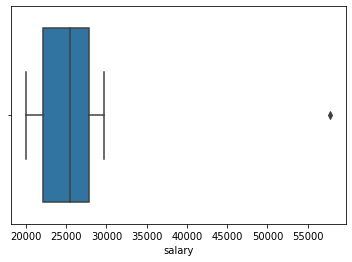

In [24]:
# Percentile
sns.boxplot(df2['salary'])

In [25]:
# Apply Capping

In [26]:
df3 = df.copy()

In [27]:
df3['salary'] = np.where(df3['salary'] >= upper_limit, upper_limit, 
                          np.where(df3['salary'] <= lower_limit, lower_limit,
                          df['salary'] ) )


In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30 non-null     int64  
 1   salary  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes
